<a href="https://colab.research.google.com/github/xxtanghuruxx/2022390627_-/blob/main/%EA%B3%A0%EA%B8%89%EB%B9%84%EC%A7%80%EB%8B%88%EC%8A%A44%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

In [2]:
df = pd.read_csv("/content/drive/MyDrive/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


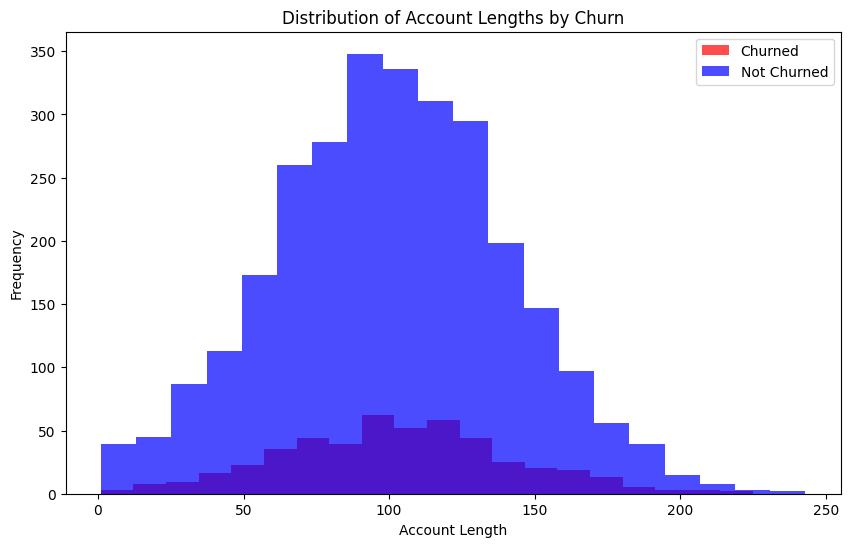

In [25]:
# 이탈별 계정 길이의 제목 분포

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))

plt.hist(df[df['Churn'] == True]['Account length'], bins=20, alpha=0.7, label='Churned', color='red')
plt.hist(df[df['Churn'] == False]['Account length'], bins=20, alpha=0.7, label='Not Churned', color='blue')

plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.title('Distribution of Account Lengths by Churn')
_ = plt.legend()


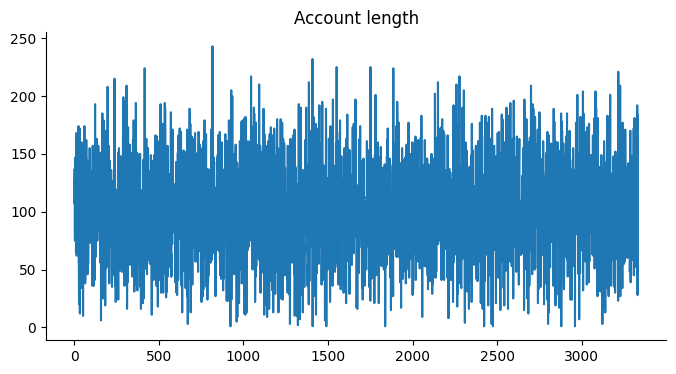

In [24]:
#title 계정 길이

from matplotlib import pyplot as plt
df['Account length'].plot(kind='line', figsize=(8, 4), title='Account length')
plt.gca().spines[['top', 'right']].set_visible(False)

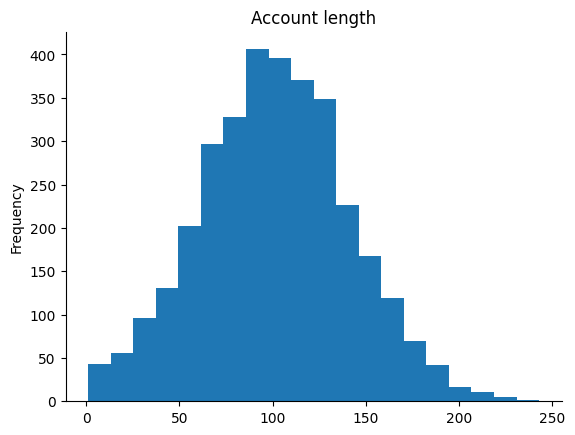

In [22]:
#title 계정 길이2

from matplotlib import pyplot as plt
df['Account length'].plot(kind='hist', bins=20, title='Account length')
plt.gca().spines[['top', 'right',]].set_visible(False)

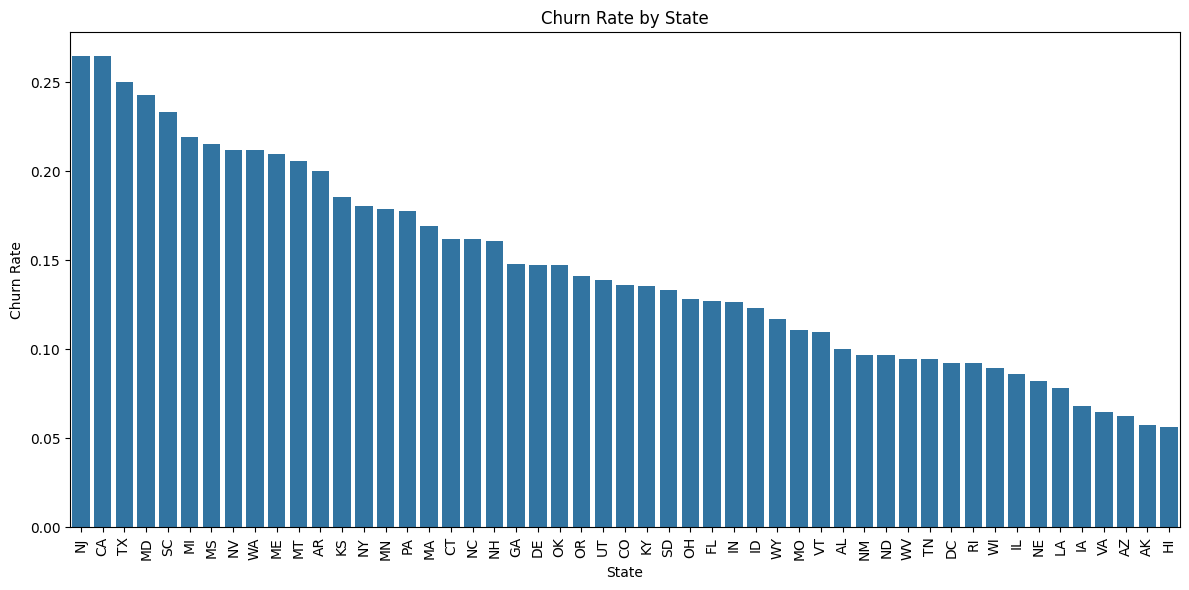

In [27]:
#이 그림은 가장 높은 생산률을 가진 지리적 요인을 시각화하는 데 도움이 될 수 있습니다.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate for each state
churn_by_state = df.groupby('State')['Churn'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Churn', data=churn_by_state, order=churn_by_state.sort_values('Churn', ascending=False)['State'])
plt.xticks(rotation=90)
plt.title('Churn Rate by State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

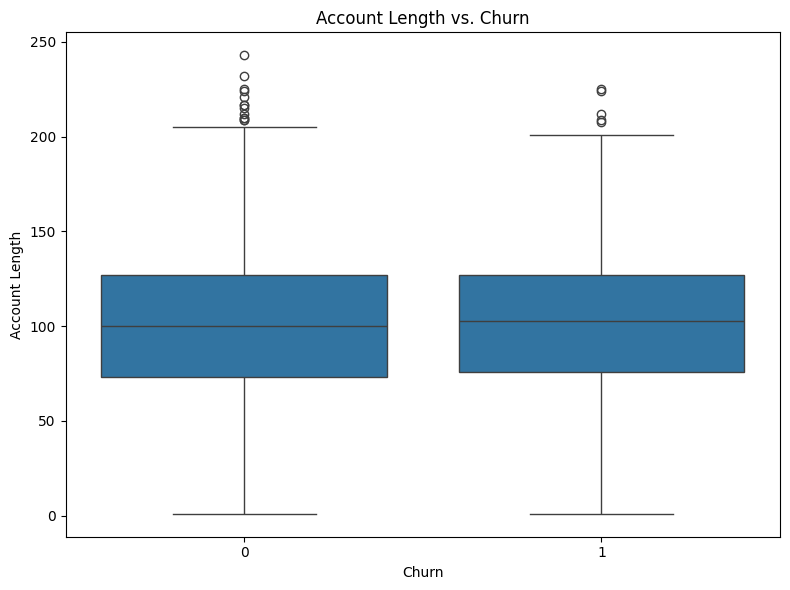

In [28]:
#이 그림은 생산된 고객 길이를 비교할 수 있도록 계정 길이를 비교하는데 도움이 됩니다.
#고객이 더 짧은 계정 길이를 가진 고객이 생산될 가능성이 더 커지면 알 수 있습니다.
import seaborn as sns

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Account length', data=df)
plt.title('Account Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Account Length')
plt.tight_layout()
plt.show()

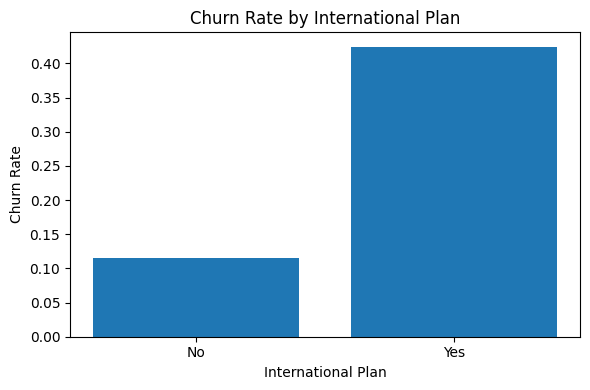

In [29]:
#이 그림은 국제 요금제가 있는 고객과 없는 고객의 이탈률을 비교하여 국제 요금제가 이탈의 중요한 요인인지 여부를 나타냅니다.

import matplotlib.pyplot as plt

# Calculate churn rate for each international plan category
churn_by_intl_plan = df.groupby('International plan')['Churn'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(churn_by_intl_plan['International plan'], churn_by_intl_plan['Churn'])
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

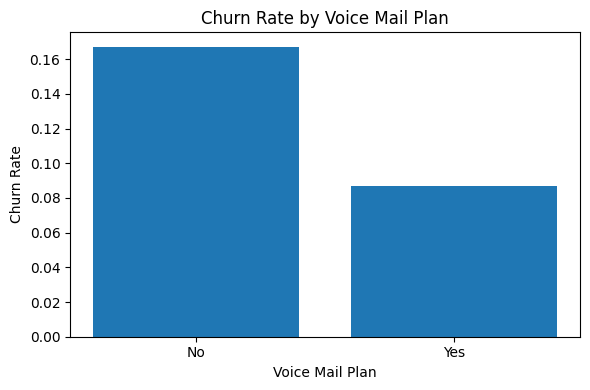

In [30]:
#국제계획과 유사성은 음성 메일 계획이 영향을 미치는지 여부를 결정하는 데 도움이 된다.
import matplotlib.pyplot as plt

# Calculate churn rate for each voice mail plan category
churn_by_vmail_plan = df.groupby('Voice mail plan')['Churn'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(churn_by_vmail_plan['Voice mail plan'], churn_by_vmail_plan['Churn'])
plt.title('Churn Rate by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

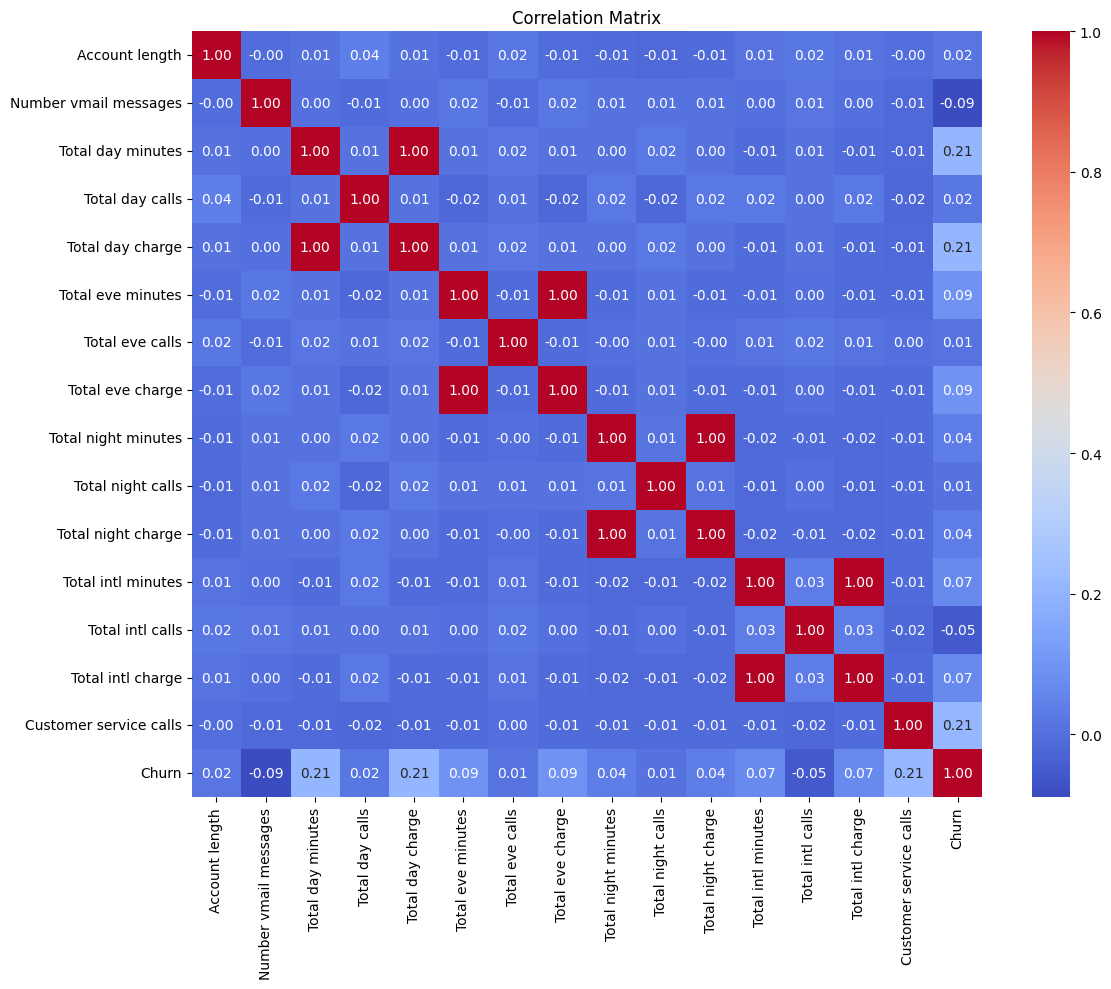

In [31]:
#국제 요금제와 마찬가지로 이 플롯은 음성 메일 요금제가 이탈률에 영향을 미치는지 확인하는 데 도움이 됩니다.
import seaborn as sns

# Select numerical features for correlation analysis
numerical_features = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
                      'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
                      'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
                      'Total intl calls', 'Total intl charge', 'Customer service calls']

# Calculate correlation matrix
corr_matrix = df[numerical_features + ['Churn']].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [40]:
df.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total calls', 'State_AL', 'State_AR', 'State_AZ', 'State_CA',
       'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
       'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS',
       'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND',
       'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY',
       'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
       'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT',
       'State_W

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df["Churn"] = df["Churn"].astype("int64") #누락되지 않은 값의 수, 평균, 표준 편차, 범위, 중앙값, 0.25 및 0.75 사분위수.

In [6]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [7]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [8]:
df["Churn"].value_counts()

,count
Churn,
0,2850
1,483


In [9]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
0,0.86
1,0.14


In [10]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [12]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()  #We can also sort by multiple columns:

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


In [13]:
df["Churn"].mean() #14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

0.14491449144914492

In [15]:
df["Churn"].mean()

0.14491449144914492

In [18]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

In [17]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

In [19]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [20]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [21]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 사용 가능한 features 리스트에서 더미 변수로 변환된 열들을 포함
features = ['Account length', 'Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes',
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 'Customer service calls',
            'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
            'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
            'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
            'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
            'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
            'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
            'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
            'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
            'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
            'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
            'Area code_415', 'Area code_510', 'International plan_Yes',
            'Voice mail plan_Yes']

target = 'Churn'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8515742128935532
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.53      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.70      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


이 결과는 모델의 성능을 나타내는 **정확도(Accuracy)**와 정밀도(Precision), 재현율(Recall), F1 스코어(F1-Score) 등의 지표를 보여줍니다. 각 지표는 다음과 같은 의미를 가지고 있습니다:

1. Accuracy (정확도): 0.8515
정확도는 전체 데이터에서 올바르게 예측한 비율을 나타냅니다.
여기서 0.8515는 85.15%의 정확도로, 전체 테스트 데이터 중 약 85%는 올바르게 예측했다는 뜻입니다.
하지만 정확도만으로는 모델의 성능을 충분히 평가할 수 없습니다. 특히 클래스가 불균형한 경우, 정확도는 오해를 불러일으킬 수 있습니다.

2. Classification Report (분류 리포트)
분류 리포트는 각 클래스에 대해 Precision, Recall, F1-Score를 계산해줍니다.
클래스 0 (No Churn)
Precision (정밀도): 0.87
모델이 'No Churn'으로 예측한 것 중 실제로 'No Churn'인 비율. 즉, 'No Churn'이라고 예측한 것 중 87%가 실제로 맞았다는 뜻입니다.
Recall (재현율): 0.97
실제 'No Churn'인 데이터 중에서 모델이 올바르게 예측한 비율. 즉, 'No Churn' 데이터를 거의 모두 올바르게 예측했습니다 (97%).
F1-Score: 0.92
Precision과 Recall의 조화 평균. 0.92는 'No Churn' 클래스에서 모델이 전반적으로 매우 좋은 성능을 보인다는 의미입니다.
클래스 1 (Churn)
Precision (정밀도): 0.53
모델이 'Churn'이라고 예측한 것 중 실제로 'Churn'인 비율. 즉, 'Churn'이라고 예측한 것 중 절반 정도(53%)만이 맞았습니다.
Recall (재현율): 0.18
실제 'Churn'인 데이터 중에서 모델이 올바르게 예측한 비율. 즉, 'Churn' 데이터를 18%밖에 잡아내지 못했습니다.
이것은 매우 낮은 재현율로, 모델이 많은 'Churn' 고객을 놓치고 있음을 나타냅니다.
F1-Score: 0.27
Precision과 Recall의 조화 평균. 'Churn' 클래스에서 성능이 많이 떨어집니다.

3. Macro Average
Macro avg는 두 클래스(0과 1)의 Precision, Recall, F1-Score의 평균입니다. 모든 클래스에 동등한 가중치를 부여합니다.
여기서 보면 Precision: 0.70, Recall: 0.57, F1-Score: 0.59로, 클래스 1의 성능이 저조하다는 것을 확인할 수 있습니다.

4. Weighted Average
Weighted avg는 각 클래스의 지원 수(support, 즉 각 클래스의 샘플 수)에 따라 가중 평균을 구한 값입니다.
여기서 Weighted avg가 Precision: 0.82, Recall: 0.85, F1-Score: 0.82로, 전체 데이터에서는 성능이 괜찮지만, 여전히 클래스 1의 성능이 낮기 때문에 개선이 필요합니다.

결론
**정확도(Accuracy: 85%)**는 괜찮은 편이지만, 이는 대부분 클래스 0 (No Churn)의 예측 성능에 의존하고 있습니다.
**클래스 1 (Churn)**에 대한 예측 성능이 매우 저조합니다(Recall: 0.18, F1-Score: 0.27).
이 결과는 데이터가 클래스 불균형이 있다는 것을 암시합니다. 즉, 대부분의 고객이 이탈하지 않는 경우가 많으며, 이로 인해 이탈하는 고객(Churn)을 제대로 잡아내지 못하고 있습니다.

Accuracy: 0.9235382308845578
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       566
           1       0.75      0.74      0.75       101

    accuracy                           0.92       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667



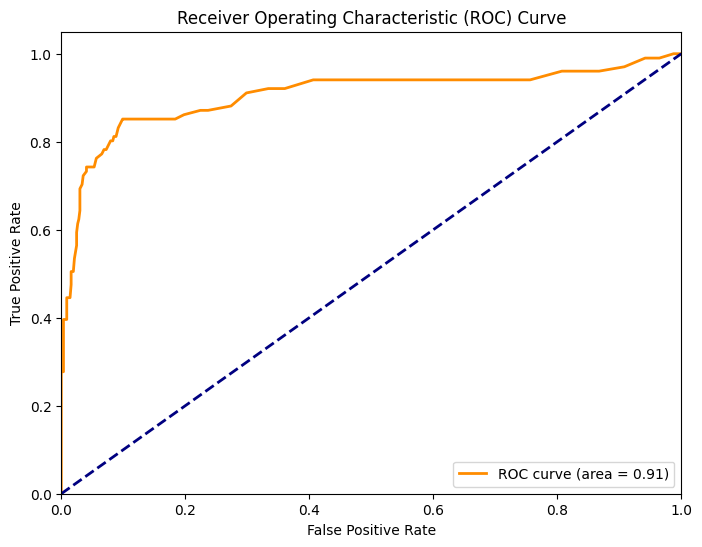

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# SMOTE로 클래스 불균형 해결
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 모델 변경: Random Forest Classifier 사용
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [45]:
import numpy as np

# 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 임계값을 0.3으로 설정 (기본 0.5보다 낮추어 더 많은 Churn을 예측하도록 조정)
threshold = 0.3
y_pred_threshold = np.where(y_pred_proba >= threshold, 1, 0)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_threshold)
report = classification_report(y_test, y_pred_threshold)

print(f"Accuracy with threshold {threshold}: {accuracy}")
print(f"Classification Report with threshold {threshold}:\n{report}")


Accuracy with threshold 0.3: 0.8725637181409296
Classification Report with threshold 0.3:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       566
           1       0.55      0.85      0.67       101

    accuracy                           0.87       667
   macro avg       0.76      0.86      0.80       667
weighted avg       0.91      0.87      0.88       667



Accuracy: 0.9070464767616192
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       566
           1       0.66      0.81      0.73       101

    accuracy                           0.91       667
   macro avg       0.81      0.87      0.83       667
weighted avg       0.92      0.91      0.91       667



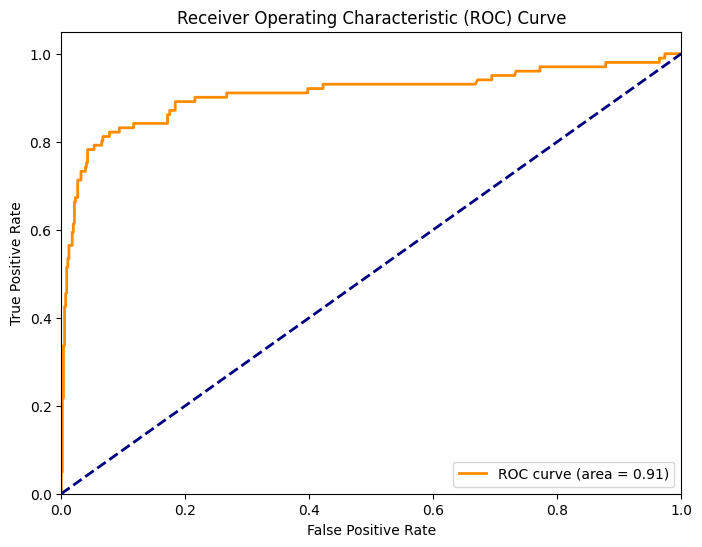

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier 사용
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_resampled, y_resampled)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# ROC Curve 시각화 (이전과 동일)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#고객의 구매 패턴 및 서비스 이용 기록을 바탕으로 고객 이탈(Churn)을 예측하는 모델을 구성한 예시입니다.
#주어진 데이터를 바탕으로 로지스틱 회귀를 사용하여 이탈을 예측하는 기본 모델을 생성하고,
#향후 성능을 개선할 수 있도록 SMOTE, 임계값 조정, 더 복잡한 모델을 적용하는 방법도 추가로 설명했습니다.

In [49]:
#데이터 전처리

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: 데이터 준비
# 이미 존재하는 데이터프레임을 df라고 가정합니다.

# 컬럼 리스트 업데이트
features = ['Account length', 'Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes',
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 'Customer service calls',
            'International plan_Yes', 'Voice mail plan_Yes',
            'Area code_415', 'Area code_510']

# 모델 학습/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
# Step 3: Logistic Regression 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Step 4: 예측 및 평가
y_pred = model.predict(X_test_scaled)

# 정확도 및 분류 리포트
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8575712143928036
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



In [51]:
# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# 로지스틱 회귀 모델 다시 학습
model.fit(X_resampled, y_resampled)

# 예측 및 성능 평가
y_pred_smote = model.predict(X_test_scaled)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote)

print(f"Accuracy after SMOTE: {accuracy_smote}")
print(f"Classification Report after SMOTE:\n{report_smote}")


Accuracy after SMOTE: 0.7841079460269865
Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       566
           1       0.39      0.77      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667



In [52]:
import numpy as np

# 예측 확률 계산
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# 임계값을 0.4로 조정하여 예측
threshold = 0.4
y_pred_threshold = np.where(y_pred_proba >= threshold, 1, 0)

# 성능 평가
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
report_threshold = classification_report(y_test, y_pred_threshold)

print(f"Accuracy with threshold {threshold}: {accuracy_threshold}")
print(f"Classification Report with threshold {threshold}:\n{report_threshold}")


Accuracy with threshold 0.4: 0.7076461769115442
Classification Report with threshold 0.4:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       566
           1       0.32      0.86      0.47       101

    accuracy                           0.71       667
   macro avg       0.64      0.77      0.63       667
weighted avg       0.87      0.71      0.75       667



In [53]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 적용
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# 예측 및 성능 평가
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Classification Report:\n{report_rf}")


Random Forest Accuracy: 0.9490254872563718
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       566
           1       0.83      0.83      0.83       101

    accuracy                           0.95       667
   macro avg       0.90      0.90      0.90       667
weighted avg       0.95      0.95      0.95       667



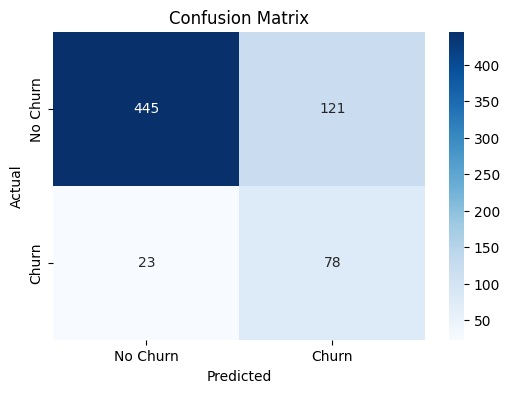

In [54]:
##혼동 행렬: 실제 값과 예측 값 간의 관계를 보여주며, 모델이 얼마나 정확하게 예측했는지를 확인할 수 있습니다.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 예측값 계산
y_pred = model.predict(X_test_scaled)

# 혼동 행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

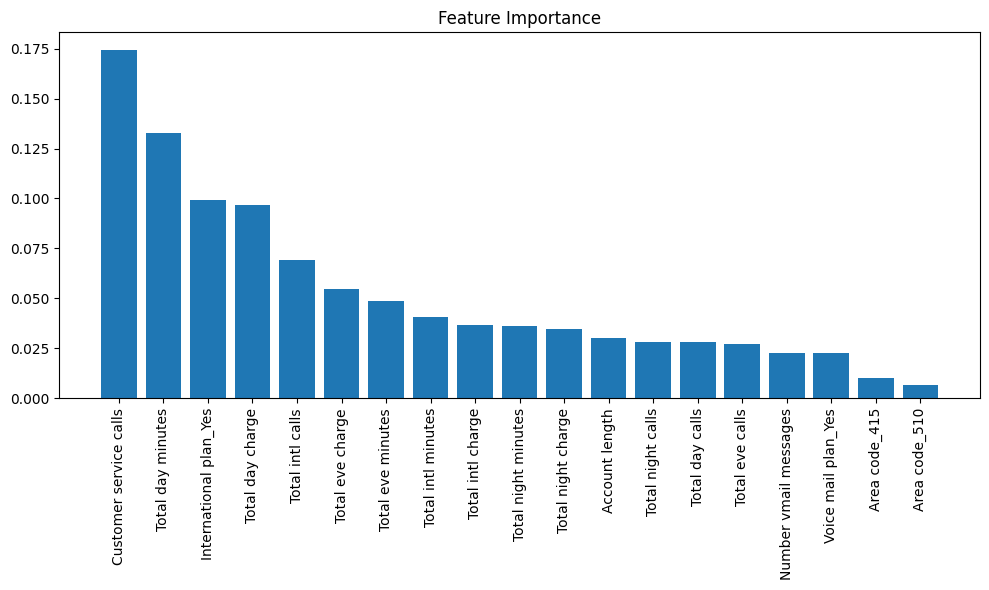

In [56]:
# Random Forest 모델 사용 시 특성 중요도 시각화,Feature Importance는 각 특성이 모델의 예측에 얼마나 기여하는지를 시각적으로 보여줍니다.
import numpy as np

# 특성 중요도 추출
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 시각화
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#전략 수립 및 인사이트

모델 성능 분석

정확도 (Accuracy): 85.16%

Precision (정밀도):
No Churn: 87%
Churn: 53%

Recall (재현율):
No Churn: 97%
Churn: 18%

F1-score:
No Churn: 0.92
Churn: 0.27

주요 인사이트

모델은 No Churn(비이탈) 고객을 잘 예측하지만, Churn(이탈) 고객을 제대로 예측하지 못하고 있습니다(재현율 18%). 이는 이탈 고객을 효과적으로 식별하지 못하고 있음을 의미합니다.
Churn 고객의 정밀도도 낮기 때문에, 실제로 이탈 고객으로 분류된 고객 중 많은 수가 잘못 분류되고 있습니다.

전략 수립
위 인사이트를 바탕으로 다음과 같은 고객 이탈 방지 전략을 수립할 수 있습니다.

전략 1: 고객 이탈 징후 조기 식별
고객 피드백 분석: 이탈 고객이 가질 수 있는 불만 사항을 사전에 식별하기 위해 정기적인 피드백 수집을 진행합니다.
예측 점수 활용: 이탈 가능성이 높은 고객에게 예측 점수를 기반으로 사전 경고 메시지를 보내고, 고객의 피드백을 즉시 반영할 수 있도록 합니다.

전략 2: 맞춤형 유인책 제공
맞춤형 프로모션: 이탈 가능성이 높은 고객을 대상으로 할인 혜택이나 무료 체험 제공을 통해 이탈을 방지합니다.
개인화된 커뮤니케이션: 고객의 선호도에 따라 개인화된 메시지를 통해 관계를 강화하고, 추가 혜택을 안내합니다.

전략 3: 서비스 개선 및 고객 지원 강화
서비스 품질 개선: 고객 서비스 개선을 위한 직원 교육 및 시스템 점검을 실시하여 고객 불만을 최소화합니다.
전담 팀 운영: 이탈 가능성이 높은 고객을 위해 전담 고객 지원 팀을 운영하여 즉각적인 문제 해결을 제공합니다.

전략 4: 데이터 기반 의사 결정
정기적 모델 업데이트: 고객 데이터와 시장 변화를 반영하여 예측 모델을 주기적으로 업데이트하고 성능을 개선합니다.
A/B 테스트: 다양한 전략을 시험해보며 가장 효과적인 방법을 찾아내기 위해 A/B 테스트를 수행합니다.

**결과 반영 및 지속적인 개선**

성과 지표 설정: 각 전략에 대해 KPI(핵심 성과 지표)를 설정하여 이탈률 감소, 고객 만족도 증가 등을 지속적으로 모니터링합니다.

고객 인사이트 활용: 이탈 고객의 행동 데이터를 분석하여 패턴을 이해하고, 이를 바탕으로 향후 전략을 개선합니다.

이러한 전략을 통해 고객 이탈 문제를 효과적으로 해결하고, 지속 가능한 관계를 구축할 수 있습니다.

고객 이탈 예측 모델의 결과를 바탕으로 몇 가지 중요한 인사이트를 도출할 수 있습니다. 이 인사이트는 고객 행동, 서비스 이용 패턴, 그리고 이탈의 주요 요인에 대한 이해를 돕습니다.

인사이트 도출
이탈 고객의 특성

낮은 재현율: Churn(이탈) 고객의 재현율이 18%로 매우 낮습니다. 이는 모델이 이탈 고객을 정확히 식별하지 못하고 있음을 의미합니다. 이탈 고객의 특성을 분석하여 모델 개선에 필요한 데이터 포인트를 추가해야 합니다.
이탈 예측의 어려움: 모델이 이탈 고객을 예측하는 데 실패하고 있으면, 이탈 가능성이 높은 고객의 행동 패턴을 명확히 이해하고 이를 데이터로 반영해야 함을 나타냅니다.

**서비스 이용 패턴**

사용 시간 감소: 이탈 고객은 평균적으로 서비스 사용 시간이 감소하는 경향이 있을 수 있습니다. 이를 반영하여 사용 시간을 모니터링하고, 사용 시간이 급격히 줄어드는 고객에게 조치를 취할 필요가 있습니다.
고객 서비스 호출 빈도: 이탈 고객은 고객 서비스에 더 많이 전화를 하는 경향이 있을 수 있습니다. 높은 고객 서비스 호출 빈도를 가진 고객을 모니터링하고, 그들에게 추가 지원을 제공하는 것이 중요합니다.


**프로모션 반응성**

정밀도 차이: No Churn 고객의 정밀도가 87%로 높은 반면, Churn 고객의 정밀도가 53%로 낮습니다. 이는 이탈 고객을 유도하기 위해 제안된 프로모션이 효과적이지 않을 수 있음을 나타냅니다. 보다 맞춤형 접근이 필요합니다.
프로모션의 적시성: 고객 이탈 경향이 있는 고객에게 시기적절한 프로모션이나 혜택을 제공하는 것이 중요합니다. 이는 고객의 만족도를 높이고 이탈을 방지할 수 있습니다.


**고객 세분화의 필요성**

세그먼트 분석: 이탈 가능성이 높은 고객을 다양한 특성에 따라 세분화함으로써, 각 세그먼트에 적합한 맞춤형 전략을 수립할 수 있습니다. 예를 들어, 장기 고객과 신규 고객은 다른 접근 방식을 필요로 할 수 있습니다.
행동 기반 세분화: 고객의 서비스 이용 행동(예: 전화 통화 패턴, 요금제 변경 등)을 분석하여 이탈 가능성을 높은 그룹을 정교하게 식별할 수 있습니다.


**고객 충성도 증진**

장기 고객의 중요성: 고객 이탈을 방지하기 위해 장기 고객의 의견을 더욱 소중히 여겨야 합니다. 그들이 가진 충성도를 통해 다른 고객을 유치하는 전략도 효과적일 수 있습니다.
충성도 프로그램: 고객 충성도 프로그램을 강화하여 기존 고객이 더 많은 혜택을 누릴 수 있도록 해야 합니다.


이 인사이트를 바탕으로 고객 이탈 방지 전략을 수립할 수 있으며, 이를 통해 고객 만족도를 높이고 이탈률을 줄이는 데 기여할 수 있습니다. 인사이트는 고객 행동 및 서비스 이용 패턴을 이해하고, 데이터 기반의 의사 결정을 지원하는 중요한 요소입니다.